In [1]:
import numpy as np
import torch
import scanpy as sc
from data import PertDataloader, Network


name2path = {
    'GNN_Disentangle-L2': 'GNN_Disentangle_GAT_string_20.0_64_2_l2_Norman2019_gene_emb_pert_emb_constant_sim_gnn',
    'GNN_Disentangle_Sim': 'GNN_Disentangle_GAT_string_20.0_64_2_l3_Norman2019_gamma2_gene_emb_pert_emb_constant_sim_gnn',
    'GNN_Disentangle_Sim_No_Gene': 'GNN_Disentangle_sim_gnn', 
    'No-Perturb': 'No_Perturb_GAT_string_20.0_64_2_l3_Norman2019_gamma2_gene_emb_pert_emb_constant_sim_gnn',
    'uncertainty': 'GNN_Disentangle_GAT_string_20.0_64_2_l3_Norman2019_gamma2_gene_emb_pert_emb_constant_sim_gnn_uncertainty_1.0_1.0'
}


name = 'uncertainty'

model_name = name2path[name]
args = np.load('./saved_args/'+model_name+'.npy', allow_pickle = True).item()
args['device'] = 'cuda:5'

In [2]:
#import wandb
#wandb.init(project='pert_gnn_simulation', entity='kexinhuang', name=name)

In [3]:
if args['network_name'] == 'string':
    args['network_path'] = '/dfs/project/perturb-gnn/graphs/STRING_full_9606.csv'

if args['dataset'] == 'Norman2019':
    data_path = '/dfs/project/perturb-gnn/datasets/Norman2019/Norman2019_hvg+perts_more_de.h5ad'

adata = sc.read_h5ad(data_path)
if 'gene_symbols' not in adata.var.columns.values:
    adata.var['gene_symbols'] = adata.var['gene_name']
gene_list = [f for f in adata.var.gene_symbols.values]
# Set up message passing network
network = Network(fname=args['network_path'], gene_list=args['gene_list'],
                  percentile=args['top_edge_percent'])

# Pertrubation dataloader
pertdl = PertDataloader(adata, network.G, network.weights, args)

There are 101013 edges in the PPI.
Creating pyg object for each cell in the data...
Local copy of pyg dataset is detected. Loading...
Loading splits...
Local copy of split is detected. Loading...
Simulation split test composition:
combo_seen0:9
combo_seen1:52
combo_seen2:18
unseen_single:37
Creating dataloaders....
Dataloaders created...


In [4]:
#args['uncertainty'] = False
#args['no_pert_emb'] = False
#args['batchnorm'] = False
#args['skipsum'] = False
#args['no_disentangle'] = False

In [5]:
model = torch.load('./saved_models/' + model_name)
#model.pert_emb_agg = 'constant'
#model.lambda_emission = False
#model.sim_gnn = False
#model.args = args
#model.uncertainty = False
#from torch.nn import ReLU
#model.act = ReLU()
from inference import evaluate, compute_metrics, deeper_analysis, GI_subgroup

test_res = evaluate(pertdl.loaders['test_loader'],
                        pertdl.loaders['edge_index'],
                        pertdl.loaders['edge_attr'], model, args)

test_metrics, test_pert_res = compute_metrics(test_res)

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/dfs/user/kexinh/miniconda3/

In [7]:
out = deeper_analysis(adata, test_res)
GI_out = GI_subgroup(out)

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

In [8]:
loader = pertdl.loaders['test_loader']
graph = pertdl.loaders['edge_index']

In [9]:

model.eval()
pert_cat = []
pred = []
truth = []
logvar = []
results = {}

for batch in loader:
    batch.to(args['device'])
    model.to(args['device'])
    graph = graph.to(args['device'])

    pert_cat.extend(batch.pert)

    with torch.no_grad():
        p, unc = model(batch, graph, None)
        t = batch.y
        
        pred.extend(p.cpu())
        truth.extend(t.cpu())
        logvar.extend(unc.cpu())
        
# all genes
results['pert_cat'] = np.array(pert_cat)

pred = torch.stack(pred)
truth = torch.stack(truth)
logvar = torch.stack(logvar)
results['pred']= pred.detach().cpu().numpy()
results['truth']= truth.detach().cpu().numpy()
results['logvar']= logvar.detach().cpu().numpy()

In [16]:
results['pred']

array([[0.0198191 , 0.11780713, 0.16394772, ..., 3.4817564 , 0.04133469,
        0.00577348],
       [0.0198191 , 0.11780713, 0.16394772, ..., 3.4789813 , 0.04133469,
        0.00577348],
       [0.0198191 , 0.11780713, 0.16394772, ..., 3.4758146 , 0.04133469,
        0.00577348],
       ...,
       [0.06330007, 0.13391382, 0.19661745, ..., 3.4496827 , 0.0795441 ,
        0.04775395],
       [0.06330007, 0.13391382, 0.19661745, ..., 3.4489303 , 0.0795441 ,
        0.04775395],
       [0.06330007, 0.13391382, 0.19661745, ..., 3.4456468 , 0.0795441 ,
        0.04775395]], dtype=float32)

In [20]:
np.mean(results['logvar'], axis = 1)

array([2.0852647, 2.085389 , 2.0920496, ..., 1.8213295, 1.8134136,
       1.8165065], dtype=float32)

<AxesSubplot:ylabel='Density'>

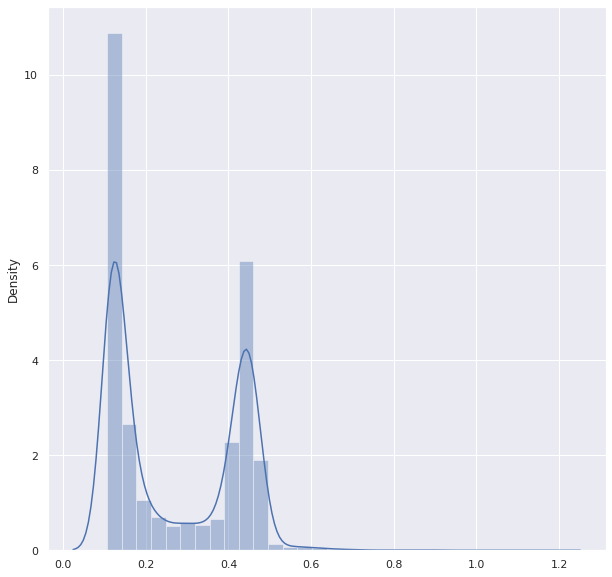

In [267]:
sns.distplot([np.std(results['logvar'][:, i]) for i in range(5045)])

<AxesSubplot:ylabel='Density'>

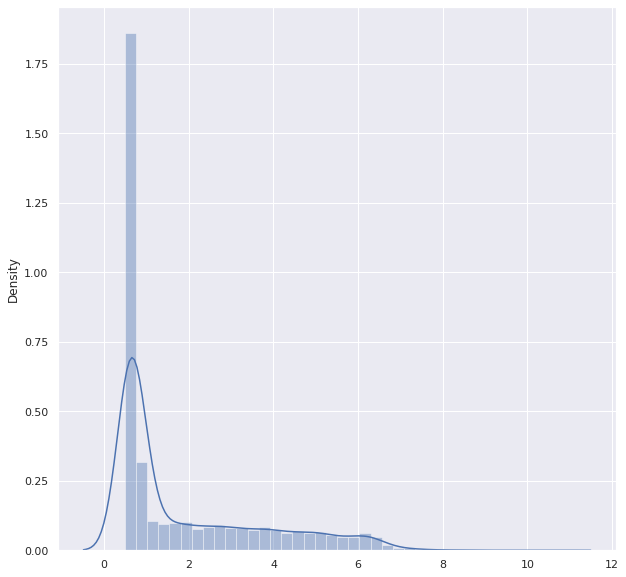

In [268]:
sns.distplot([np.mean(results['logvar'][:, i]) for i in range(5045)])

<AxesSubplot:ylabel='Density'>

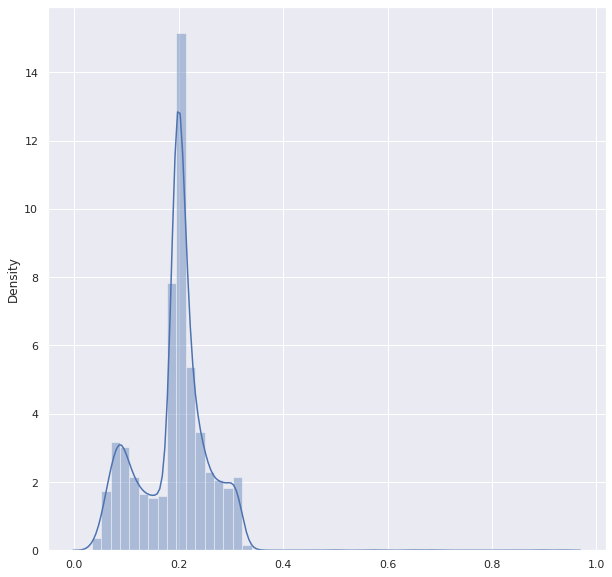

In [269]:
sns.distplot([np.std(results['logvar'][:, i])/np.mean(results['logvar'][:, i]) for i in range(5045)])

In [38]:
# calculate mean expression for each condition
unique_conditions = adata.obs.condition.unique()
conditions2index = {}
for i in unique_conditions:
    conditions2index[i] = np.where(adata.obs.condition == i)[0]
    
condition2mean_expression = {}
for i, j in conditions2index.items():
    condition2mean_expression[i] = np.mean(adata.X[j], axis = 0)
    
pert_list = np.array(list(condition2mean_expression.keys()))
mean_expression = np.array(list(condition2mean_expression.values())).reshape(len(adata.obs.condition.unique()), adata.X.toarray().shape[1])

ctrl = mean_expression[np.where(pert_list == 'ctrl')[0]]
most_variable_genes = np.argsort(np.std(mean_expression, axis = 0))[-200:]
gene_list = adata.var['gene_name'].values

In [242]:
results['logvar'][:, most_variable_genes]

array([[ 5.414583 ,  6.437565 ,  4.1216216, ...,  7.991401 ,  8.821293 ,
        10.728392 ],
       [ 5.2731557,  6.5820537,  4.1216216, ...,  7.175086 ,  8.872845 ,
        10.672016 ],
       [ 5.1787214,  6.216765 ,  4.1216216, ...,  7.748259 ,  8.741689 ,
        10.671398 ],
       ...,
       [ 4.75484  ,  5.915606 ,  3.4175398, ...,  6.8353963,  9.018751 ,
        10.665829 ],
       [ 4.8090153,  5.9195633,  3.4175398, ...,  7.8119674,  9.02081  ,
        10.668493 ],
       [ 4.80797  ,  5.9357567,  3.4175398, ...,  6.8353963,  8.845741 ,
        10.443722 ]], dtype=float32)

In [273]:
import pandas as pd
pert2unc = pd.DataFrame(tuple(zip(results['pert_cat'], np.mean(results['logvar'], axis = 1)))).groupby(0).agg(np.mean)
pert2unc = dict(zip(pert2unc.index.values, pert2unc.values))

In [88]:
top20_var, top50_var, top100_var = {}, {}, {}
pert2pert_full_id = dict(adata.obs[['condition', 'cov_drug_dose_name']].values)
geneid2name = dict(zip(adata.var.index.values, adata.var['gene_name']))
geneid2idx = dict(zip(adata.var.index.values, range(len(adata.var.index.values))))

for pert in np.unique(test_res['pert_cat']):
    #de_names = [geneid2name[i] for i in adata.uns['rank_genes_groups_cov'][pert2pert_full_id[pert]]]
    de_idx = [geneid2idx[i] for i in adata.uns['rank_genes_groups_cov'][pert2pert_full_id[pert]]]
    de_idx_100 = [geneid2idx[i] for i in adata.uns['rank_genes_groups_cov_top100'][pert2pert_full_id[pert]]]
    de_idx_50 = [geneid2idx[i] for i in adata.uns['rank_genes_groups_cov_top50'][pert2pert_full_id[pert]]]
    
    pert_idx = np.where(test_res['pert_cat'] == pert)[0]
    
    top20_var[pert] = np.mean(results['logvar'][pert_idx][:, de_idx], axis = 0)
    top50_var[pert] = np.mean(results['logvar'][pert_idx][:, de_idx_50], axis = 0)
    top100_var[pert] = np.mean(results['logvar'][pert_idx][:, de_idx_100], axis = 0)

In [90]:
results['logvar'][pert_idx][:, de_idx].shape

(336, 20)

In [244]:
from scipy.stats import spearmanr

In [246]:
metric = 'pearson_delta_top50_de'
stats_summary = [pert2unc[i][0] for i in test_pert_res.keys() if metric in out[i]]
metric_summary = [out[i][metric] for i in test_pert_res.keys() if metric in out[i]]
print(spearmanr(stats_summary, metric_summary))
print(pearsonr(stats_summary, metric_summary))

SpearmanrResult(correlation=0.4289624418559951, pvalue=1.5520798679963763e-06)
(0.21654290139635912, 0.01955623090021518)


In [274]:
metric = 'pearson_delta'
stats_summary = [pert2unc[i][0] for i in test_pert_res.keys() if metric in out[i]]
metric_summary = [out[i][metric] for i in test_pert_res.keys() if metric in out[i]]
print(spearmanr(stats_summary, metric_summary))
print(pearsonr(stats_summary, metric_summary))

SpearmanrResult(correlation=0.6123015415369238, pvalue=2.8062950393356123e-13)
(0.6141705957409817, 2.269435761893365e-13)


In [285]:
metric = 'pearson_delta'
stats_summary = [-np.exp(-pert2unc[i][0]) for i in test_pert_res.keys() if metric in out[i]]
metric_summary = [out[i][metric] for i in test_pert_res.keys() if metric in out[i]]
print(spearmanr(stats_summary, metric_summary))
print(pearsonr(stats_summary, metric_summary))

SpearmanrResult(correlation=0.6123015415369238, pvalue=2.8062950393356123e-13)
(0.5720936047427329, 1.9671201705837172e-11)


In [291]:
pert2status = {}

for i in ['combo_seen1', 'combo_seen2', 'combo_seen0', 'unseen_single']:
    for k in pertdl.subgroup['test_subgroup'][i]:
        pert2status[k] = i

In [370]:
[i for i in test_pert_res.keys() if (metric in out[i]) and (np.exp(-pert2unc[i][0]) > 0.25)]

['ARID1A+ctrl',
 'CELF2+ctrl',
 'FOXL2+ctrl',
 'PTPN1+ctrl',
 'ctrl+FOXL2',
 'ctrl+SET']

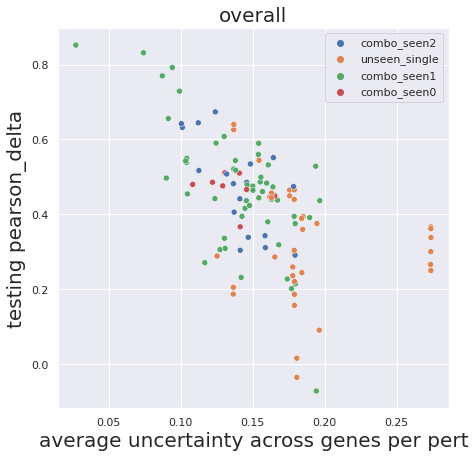

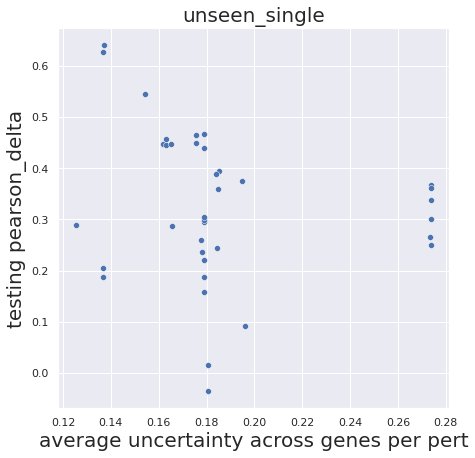

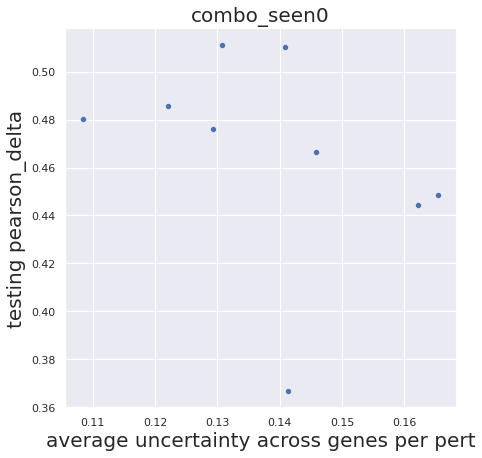

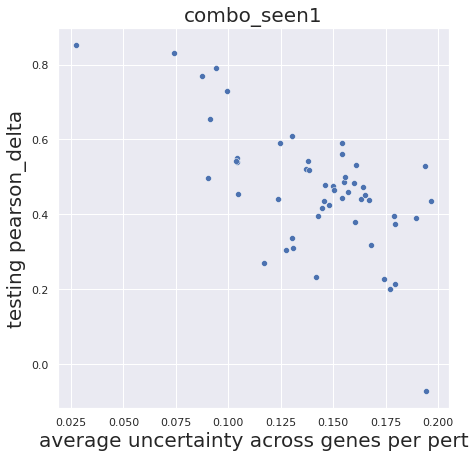

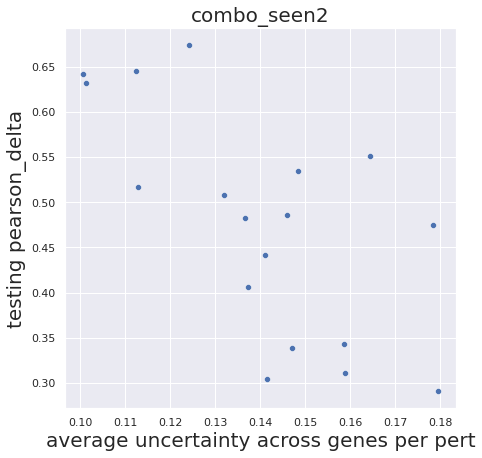

In [379]:
import matplotlib.pyplot as plt
metric = 'pearson_delta'
sns.set(rc={'figure.figsize':(7, 7)})

plt.figure()
stats_summary = [np.exp(-pert2unc[i][0]) for i in test_pert_res.keys() if metric in out[i]]
metric_summary = [out[i][metric] for i in test_pert_res.keys() if metric in out[i]]
#reduce_outlier = np.where(stats_summary < np.quantile(stats_summary, 0.85))[0]

ax = sns.scatterplot(np.array(stats_summary),
                np.array(metric_summary), hue = [pert2status[i] for i in test_pert_res.keys()])
ax.set_xlabel('average uncertainty across genes per pert', fontsize = 20)
ax.set_ylabel('testing ' + metric, fontsize = 20)
ax.set_title('overall', fontsize = 20)

for x in ['unseen_single', 'combo_seen0', 'combo_seen1', 'combo_seen2']:
    plt.figure()
    stats_summary = [np.exp(-pert2unc[i][0]) for i in pertdl.subgroup['test_subgroup'][x] if metric in out[i]]
    metric_summary = [out[i][metric] for i in pertdl.subgroup['test_subgroup'][x] if metric in out[i]]
    #reduce_outlier = np.where(stats_summary < np.quantile(stats_summary, 0.85))[0]
    
    ax = sns.scatterplot(np.array(stats_summary),
                    np.array(metric_summary))
    ax.set_xlabel('average uncertainty across genes per pert', fontsize = 20)
    ax.set_ylabel('testing ' + metric, fontsize = 20)
    ax.set_title(x, fontsize = 20)
    

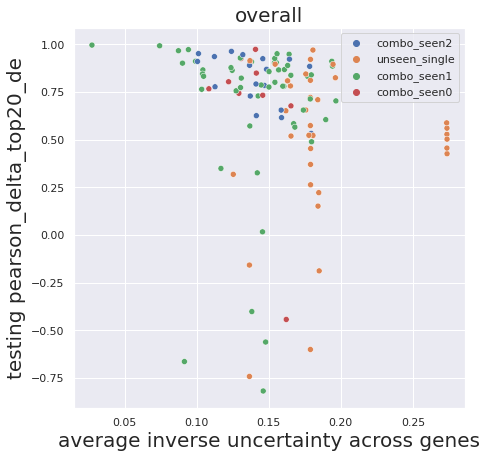

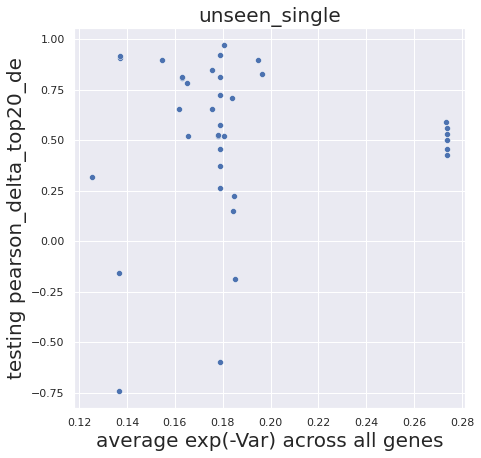

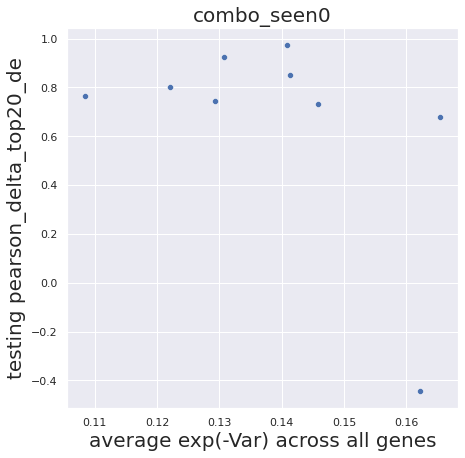

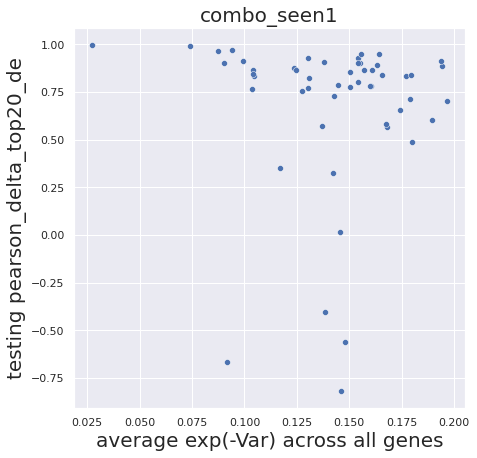

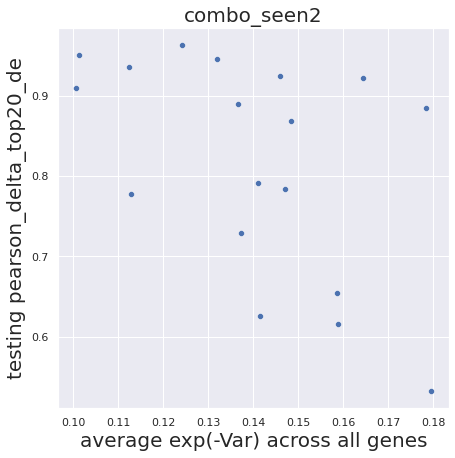

In [295]:
import matplotlib.pyplot as plt
metric = 'pearson_delta_top20_de'
sns.set(rc={'figure.figsize':(7, 7)})

plt.figure()
stats_summary = [np.exp(-pert2unc[i][0]) for i in test_pert_res.keys() if metric in out[i]]
metric_summary = [out[i][metric] for i in test_pert_res.keys() if metric in out[i]]
#reduce_outlier = np.where(stats_summary < np.quantile(stats_summary, 0.85))[0]

ax = sns.scatterplot(np.array(stats_summary),
                np.array(metric_summary), hue = [pert2status[i] for i in test_pert_res.keys()])
ax.set_xlabel('average inverse uncertainty across genes', fontsize = 20)
ax.set_ylabel('testing ' + metric, fontsize = 20)
ax.set_title('overall', fontsize = 20)

for x in ['unseen_single', 'combo_seen0', 'combo_seen1', 'combo_seen2']:
    plt.figure()
    stats_summary = [np.exp(-pert2unc[i][0]) for i in pertdl.subgroup['test_subgroup'][x] if metric in out[i]]
    metric_summary = [out[i][metric] for i in pertdl.subgroup['test_subgroup'][x] if metric in out[i]]
    #reduce_outlier = np.where(stats_summary < np.quantile(stats_summary, 0.85))[0]
    
    ax = sns.scatterplot(np.array(stats_summary),
                    np.array(metric_summary))
    ax.set_xlabel('average exp(-Var) across all genes', fontsize = 20)
    ax.set_ylabel('testing ' + metric, fontsize = 20)
    ax.set_title(x, fontsize = 20)
    

In [105]:
import warnings
warnings.filterwarnings("ignore")


In [310]:
top = np.quantile(np.array(list(pert2unc.values())), 0.9)

---- pearson_delta----
Total Mean: 0.42312661489673964
After uncertainty filter Mean: 0.6694132268922558
---- mse_top20_de----
Total Mean: 0.18273897
After uncertainty filter Mean: 0.15350269
---- mse_top50_de----
Total Mean: 0.11767991
After uncertainty filter Mean: 0.107813425
---- frac_in_range_25_75----
Total Mean: 0.5079751065593429
After uncertainty filter Mean: 0.5863433092535261
---- frac_sigma_below_1----
Total Mean: 0.7421811635885424
After uncertainty filter Mean: 0.7863573818682178
---- pearson_delta_top50_de----
Total Mean: 0.6524152980226765
After uncertainty filter Mean: 0.7777469757518678


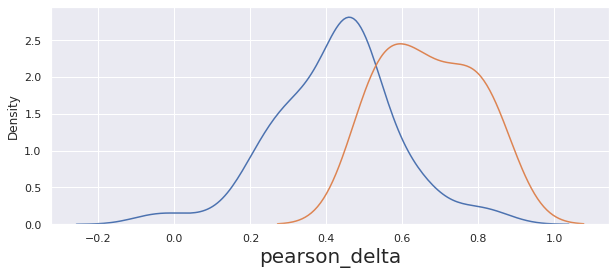

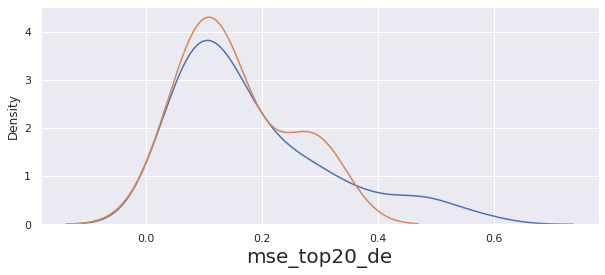

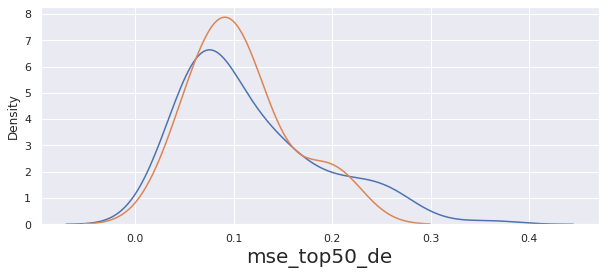

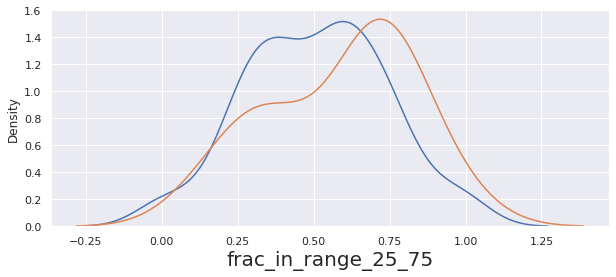

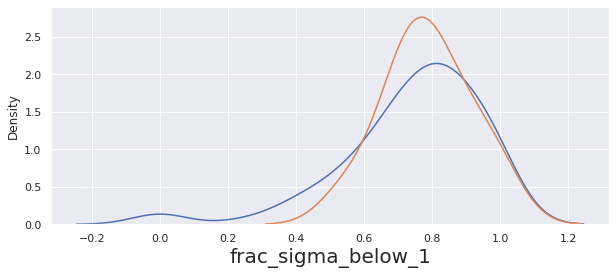

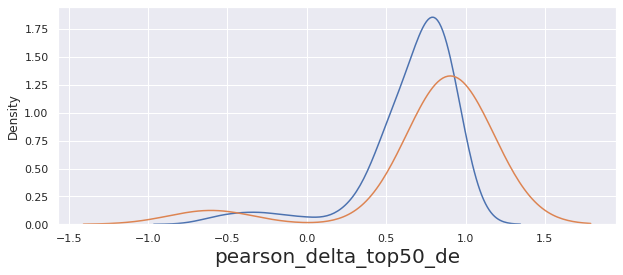

In [311]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 4)})


for m in ['pearson_delta', 'mse_top20_de', 'mse_top50_de', 'frac_in_range_25_75', 'frac_sigma_below_1', 'pearson_delta_top50_de']:
    plt.figure()
    ax = sns.distplot([i[m] for i in out.values() if m in i], hist = False)
    ax = sns.distplot([i[m] for k, i in out.items() if (pert2unc[k][0] > top) and (m in i)], hist = False)
    print('---- ' + m + '----')
    print('Total Mean: ' + str(np.mean([i[m] for i in out.values() if m in i])))
    print('After uncertainty filter Mean: ' + str(np.mean([i[m] for k, i in out.items() if (pert2unc[k][0] > top) and (m in i)])))

    ax.set_xlabel(m, fontsize = 20)

In [153]:
pred_mean_20, pred_mean_50, pred_mean_100 = {}, {}, {}
true_mean_20, true_mean_50, true_mean_100 = {}, {}, {}
std_20, std_50, std_100 = {}, {}, {}
gap_20, gap_50, gap_100 = {}, {}, {}

for pert in np.unique(test_res['pert_cat']):
    de_idx = [geneid2idx[i] for i in adata.uns['rank_genes_groups_cov'][pert2pert_full_id[pert]]]
    de_idx_100 = [geneid2idx[i] for i in adata.uns['rank_genes_groups_cov_top100'][pert2pert_full_id[pert]]]
    de_idx_50 = [geneid2idx[i] for i in adata.uns['rank_genes_groups_cov_top50'][pert2pert_full_id[pert]]]

    pert_idx = np.where(test_res['pert_cat'] == pert)[0]
    pred_mean_20[pert] = np.mean(test_res['pred'][pert_idx][:, de_idx], axis = 0)- ctrl[0][de_idx]
    true_mean_20[pert] = np.mean(test_res['truth'][pert_idx][:, de_idx], axis = 0) - ctrl[0][de_idx]
    
    std_20[pert] = np.std(test_res['truth'][pert_idx][:, de_idx] - ctrl[0][de_idx], axis = 0)
    gap_20[pert] = np.abs(pred_mean_20[pert] - true_mean_20[pert])/std_20[pert]

<AxesSubplot:>

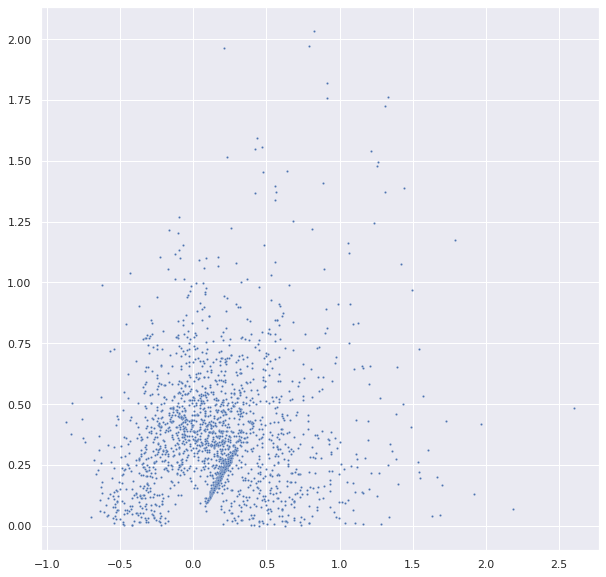

In [261]:
mse_all = []
var_all = []

for pert in test_pert_res.keys():
    s = np.abs(pred_mean_20[pert] - true_mean_20[pert]).reshape(1, -1)[0].reshape(1,-1)
    mse = s
    mse_all.extend(mse)
    var_all.extend(pred_mean_20[pert].reshape(1, -1)[0])
    
sns.set(rc={'figure.figsize':(10, 10)})
sns.scatterplot(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,), s = 5)


In [262]:
print(spearmanr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))
print(pearsonr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))

SpearmanrResult(correlation=0.01757609241977546, pvalue=0.3974490838635134)
(0.11659849740512221, 1.7780039166876214e-08)


Text(0, 0.5, 'MSE')

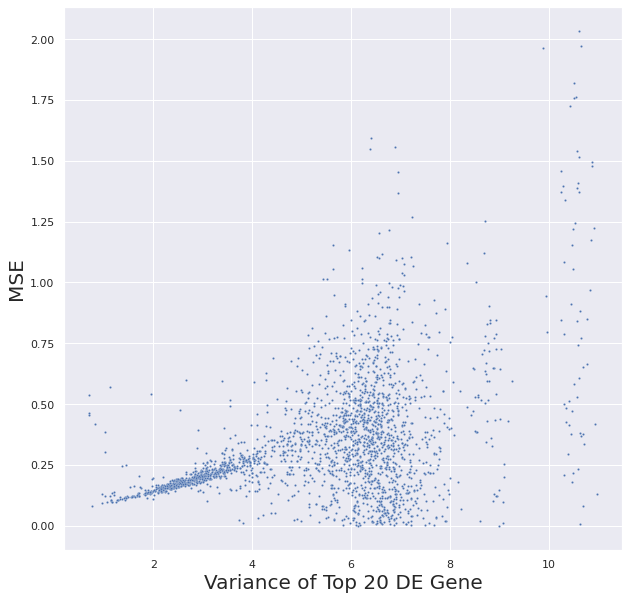

In [322]:
mse_all = []
var_all = []

for pert in test_pert_res.keys():
    s = np.abs(pred_mean_20[pert] - true_mean_20[pert]).reshape(1, -1)[0].reshape(1,-1)
    mse = s
    mse_all.extend(mse)
    var_all.extend(top20_var[pert].reshape(1, -1)[0])
    
sns.set(rc={'figure.figsize':(10, 10)})
ax = sns.scatterplot(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,), s = 5)
ax.set_xlabel("Variance of Top 20 DE Gene", fontsize = 20)
ax.set_ylabel("MSE", fontsize = 20)

In [248]:
print(spearmanr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))
print(pearsonr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))

SpearmanrResult(correlation=0.37822807354107957, pvalue=8.552042841888917e-80)
(0.460726321675634, 2.866779191161147e-122)


In [316]:
pred_mean = {}
true_mean = {}
all_var = {}

for pert in np.unique(test_res['pert_cat']):
    pert_idx = np.where(test_res['pert_cat'] == pert)[0]
    pred_mean[pert] = np.mean(test_res['pred'][pert_idx], axis = 0)- ctrl[0]
    true_mean[pert] = np.mean(test_res['truth'][pert_idx], axis = 0) - ctrl[0]
    all_var[pert] = np.mean(results['logvar'][pert_idx], axis = 0)


Text(0, 0.5, 'MSE')

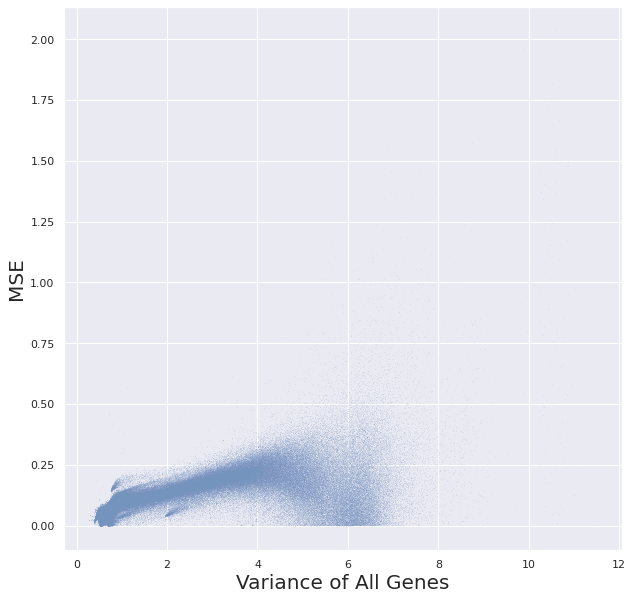

In [323]:
mse_all = []
var_all = []

for pert in test_pert_res.keys():
    s = np.abs(pred_mean[pert] - true_mean[pert]).reshape(1, -1)[0].reshape(1,-1)
    mse = s
    mse_all.extend(mse)
    var_all.extend(all_var[pert].reshape(1, -1)[0])
    
sns.set(rc={'figure.figsize':(10, 10)})
ax = sns.scatterplot(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,), s = 0.1)
ax.set_xlabel("Variance of All Genes", fontsize = 20)
ax.set_ylabel("MSE", fontsize = 20)

In [321]:
print(spearmanr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))
print(pearsonr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))

SpearmanrResult(correlation=0.8225502934738401, pvalue=0.0)
(0.6943534680121213, 0.0)


<AxesSubplot:>

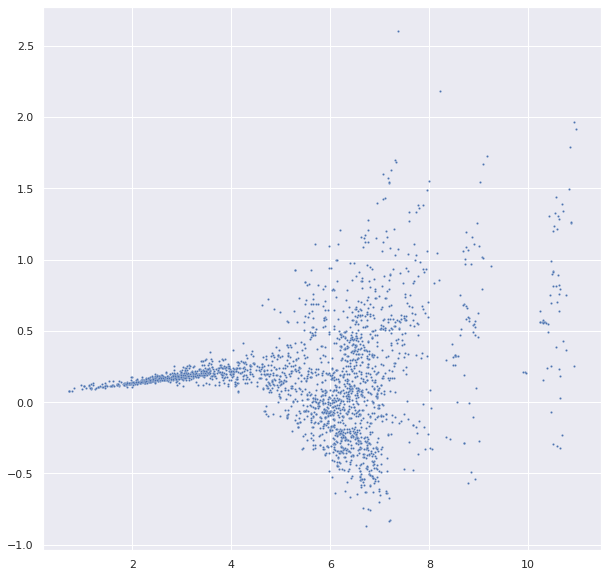

In [255]:
mse_all = []
var_all = []

for pert in test_pert_res.keys():
    s = pred_mean_20[pert].reshape(1, -1)[0].reshape(1,-1)
    mse_all.extend(s)
    var_all.extend(top20_var[pert].reshape(1, -1)[0])
    
sns.set(rc={'figure.figsize':(10, 10)})
sns.scatterplot(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,), s = 5)


In [256]:
print(spearmanr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))
print(pearsonr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))

SpearmanrResult(correlation=0.0721561148881094, pvalue=0.0005048684522739069)
(0.16085028369288523, 6.481660430864143e-15)


<AxesSubplot:>

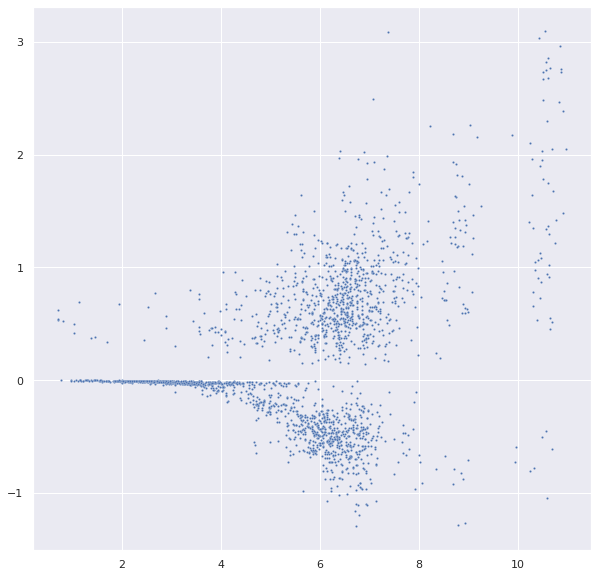

In [257]:
mse_all = []
var_all = []

for pert in test_pert_res.keys():
    s = true_mean_20[pert].reshape(1, -1)[0].reshape(1,-1)
    mse_all.extend(s)
    var_all.extend(top20_var[pert].reshape(1, -1)[0])
    
sns.set(rc={'figure.figsize':(10, 10)})
sns.scatterplot(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,), s = 5)


In [336]:
print(spearmanr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))
print(pearsonr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))

SpearmanrResult(correlation=0.8225502934738401, pvalue=0.0)
(0.6943534680121213, 0.0)


<AxesSubplot:>

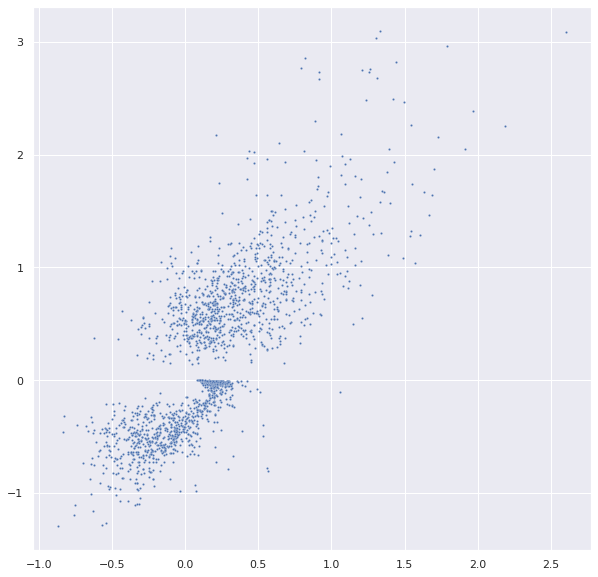

In [259]:
mse_all = []
var_all = []

for pert in test_pert_res.keys():
    s = true_mean_20[pert].reshape(1, -1)[0].reshape(1,-1)
    mse_all.extend(s)
    var_all.extend(pred_mean_20[pert].reshape(1, -1)[0].reshape(1,-1))
    
sns.set(rc={'figure.figsize':(10, 10)})
sns.scatterplot(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,), s = 5)


In [260]:
print(spearmanr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))
print(pearsonr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))

SpearmanrResult(correlation=0.6997602436973084, pvalue=0.0)
(0.7688688872610339, 0.0)


In [382]:
from scipy.stats import pearsonr, spearmanr
mean_expression_pred = {}
for pert in np.unique(test_res['pert_cat']):
    p_idx = np.where(test_res['pert_cat'] == pert)[0]
    mean_expression_pred[pert] = np.mean(test_res['pred'][p_idx], axis = 0)
    
delta_test_pred = (np.array([mean_expression_pred[i] for i in mean_expression_pred.keys()]) - ctrl)[:, most_variable_genes]
delta_test_true = (np.array([mean_expression[np.where(pert_list == i)[0]][0] for i in mean_expression_pred.keys()])- ctrl)[:, most_variable_genes]

gene_level_pearson = []
for i in range(delta_test_pred.shape[1]):

    pred_gene = delta_test_pred[:, i]
    true_gene = delta_test_true[:, i]
    
    gene_level_pearson.append(pearsonr(pred_gene, true_gene)[0])


In [383]:
gene_level_pearson

[0.820109445166456,
 0.43363716134000757,
 0.767092536034101,
 0.20107262958609126,
 0.36493473375545005,
 0.6593325509424889,
 0.2586694830532417,
 0.7671584734334488,
 0.3103976706664158,
 0.5969170535117946,
 0.4687520282471187,
 0.2585419066262789,
 0.24030632595848872,
 0.767448990674172,
 0.6301756967078155,
 0.29527259660106936,
 0.5464674461030439,
 0.668229785384087,
 0.19861149076743848,
 0.2697115136091831,
 0.04039366093498682,
 0.35876967245352775,
 0.20739323104932117,
 0.2741352612939102,
 0.4654313935111017,
 0.27398231816598445,
 0.6424075396590281,
 0.19164103366651822,
 0.3117321868486593,
 0.47109017337925685,
 0.242481095878042,
 0.26276909390547804,
 0.37267850626496163,
 0.37631160542700276,
 0.37495410868160833,
 0.11008280710043845,
 0.11989301204919472,
 0.6276458898200834,
 0.583425371245644,
 0.11694972771290833,
 0.4507989394374768,
 0.0425081373478141,
 0.2534032104070548,
 0.23346238967365782,
 0.07372777011155837,
 0.6942189210375109,
 0.2998613946842444

<AxesSubplot:>

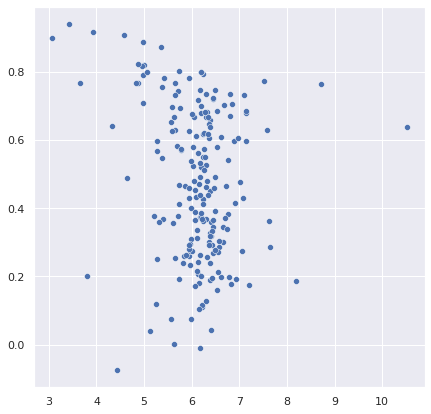

In [388]:
sns.scatterplot(np.mean(results['logvar'], axis = 0)[most_variable_genes], gene_level_pearson)

In [342]:
pred_mean_20 = {}
true_mean_20 = {}
pred_mean_20_delta = {}
true_mean_20_delta = {}

for pert in np.unique(test_res['pert_cat']):
    de_idx = [geneid2idx[i] for i in adata.uns['rank_genes_groups_cov'][pert2pert_full_id[pert]]]
    pert_idx = np.where(test_res['pert_cat'] == pert)[0]
    pred_mean_20[pert] = np.mean(test_res['pred'][pert_idx][:, de_idx], axis = 0)
    true_mean_20[pert] = np.mean(test_res['truth'][pert_idx][:, de_idx], axis = 0)
    pred_mean_20_delta[pert] = np.mean(test_res['pred'][pert_idx][:, de_idx], axis = 0) - ctrl[0][de_idx]
    true_mean_20_delta[pert] = np.mean(test_res['truth'][pert_idx][:, de_idx], axis = 0) - ctrl[0][de_idx]


In [360]:
def get_plot(pert):
    print('Looking at Testing Perturbation ' + pert)
    print('pearson_delta_top20_de: ' + str(out[pert]['pearson_delta_top20_de']))
    sns.set(rc={'figure.figsize':(10, 4)})
    
    var = top20_var[pert].reshape(1, -1)[0] 
    ax = sns.heatmap(np.vstack((true_mean_20[pert].reshape(1,-1), pred_mean_20[pert].reshape(1,-1))))
    t = ax.set_yticklabels(['True', 'Predicted'], fontsize = 10)
    ax.set(xticklabels=[])  
    
    #plt.figure()
    
    #var = top20_var[pert].reshape(1, -1)[0] 
    #ax = sns.heatmap(np.vstack((true_mean_20_delta[pert].reshape(1,-1), pred_mean_20_delta[pert].reshape(1,-1))))
    #t = ax.set_yticklabels(['True Delta', 'Pred Delta'], fontsize = 10)
    #ax.set(xticklabels=[])  

    sns.set(rc={'figure.figsize':(10, 2)})

    plt.figure()
    s = np.abs(pred_mean_20[pert] - true_mean_20[pert]).reshape(1, -1)[0].reshape(1,-1)
    ax3 = sns.heatmap(s**2, cmap="BuGn")
    t = ax3.set_yticklabels(['MSE'], fontsize = 10)
    ax3.set(xticklabels=[])  

    plt.figure()
    ax2 = sns.heatmap(var.reshape(1, -1), cmap="Blues")
    t = ax2.set_yticklabels(['Uncertainty'], fontsize = 10)
    t = ax2.set_xticklabels([geneid2name[i] for i in adata.uns['rank_genes_groups_cov'][pert2pert_full_id[pert]]], rotation = 90, fontsize = 10)


Looking at Testing Perturbation BCL2L11+BAK1
pearson_delta_top20_de: 0.8856645679836096


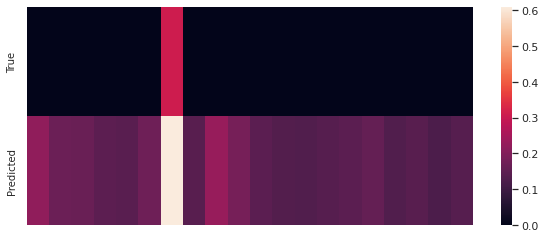

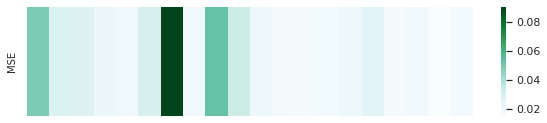

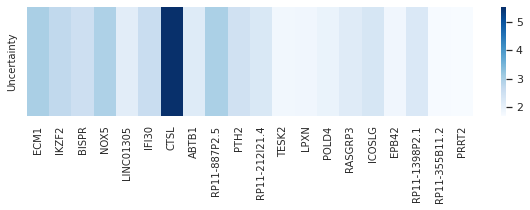

In [361]:
get_plot('BCL2L11+BAK1')

Looking at Testing Perturbation DUSP9+ETS2
pearson_delta_top20_de: 0.3255172064889786


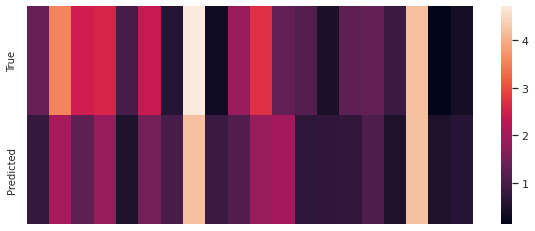

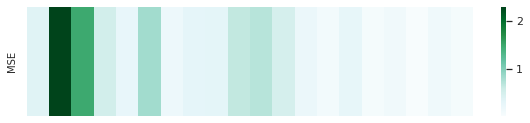

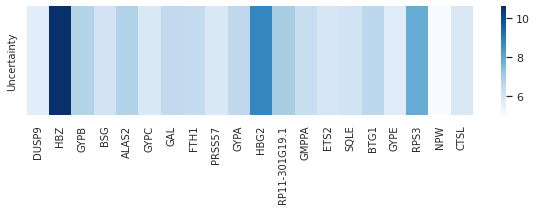

In [362]:
get_plot('DUSP9+ETS2')

Looking at Testing Perturbation EGR1+ctrl
pearson_delta_top20_de: 0.31777388085412445


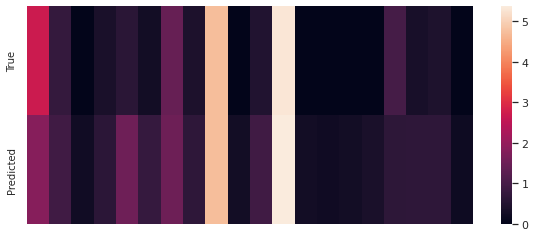

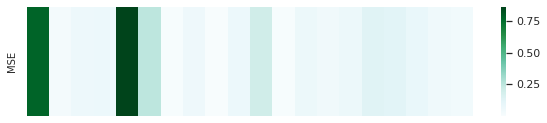

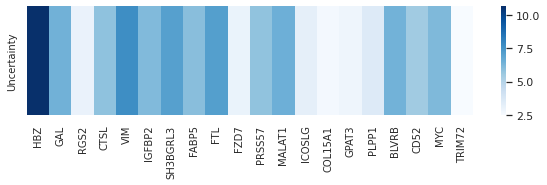

In [363]:
get_plot('EGR1+ctrl')

Looking at Testing Perturbation ctrl+SET
pearson_delta_top20_de: 0.5878076387537667


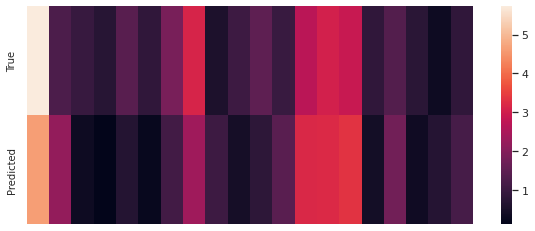

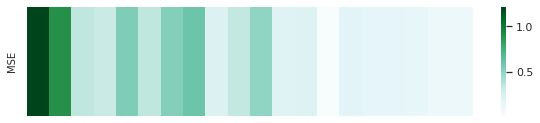

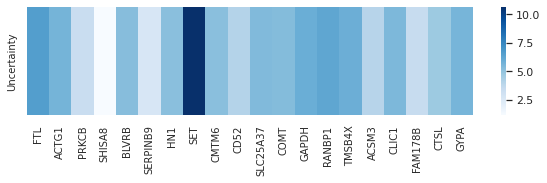

In [364]:
get_plot('ctrl+SET')

Looking at Testing Perturbation COL2A1+ctrl
pearson_delta_top20_de: 0.36978347754531127


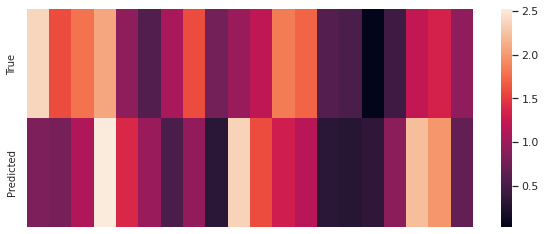

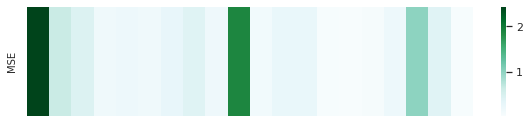

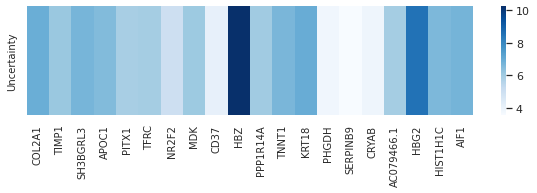

In [365]:
get_plot('COL2A1+ctrl')

Looking at Testing Perturbation FOSB+PTPN12
pearson_delta_top20_de: 0.34861986128982736


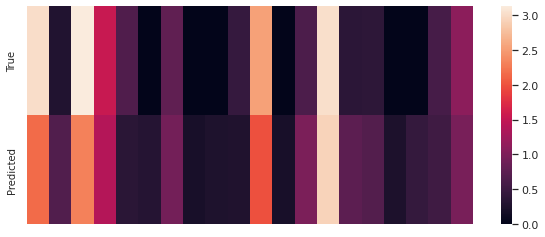

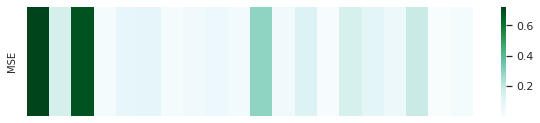

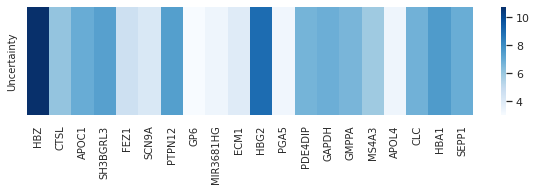

In [366]:
get_plot('FOSB+PTPN12')

Looking at Testing Perturbation BPGM+ZBTB1
pearson_delta_top20_de: 0.9085564423721597


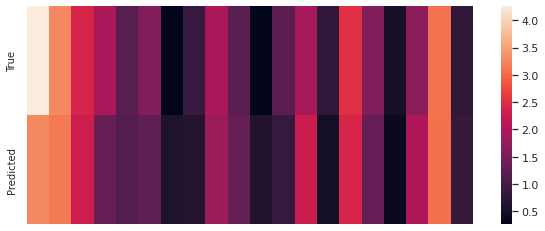

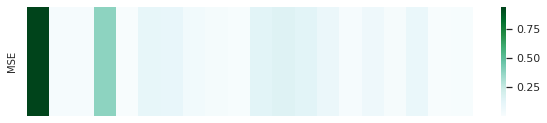

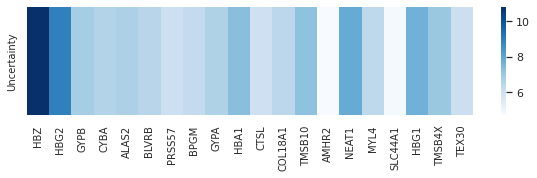

In [369]:
get_plot('BPGM+ZBTB1')

In [367]:
{i: j['pearson_delta_top20_de'] for i,j in out.items()}

{'AHR+KLF1': 0.6256252607756352,
 'ARID1A+ctrl': 0.42603454120799217,
 'BCL2L11+BAK1': 0.8856645679836096,
 'BCL2L11+TGFBR2': 0.8319273659474575,
 'BCL2L11+ctrl': 0.8244373349036787,
 'BCORL1+ctrl': 0.26295931174838244,
 'BPGM+SAMD1': 0.8657321542161921,
 'BPGM+ZBTB1': 0.9085564423721597,
 'BPGM+ctrl': 0.8110797187936358,
 'C3orf72+FOXL2': -0.4437072615746268,
 'C3orf72+ctrl': 0.651286997865859,
 'CBL+CNN1': 0.8675074888538747,
 'CBL+PTPN12': 0.8489956674671585,
 'CBL+PTPN9': 0.9041016673441882,
 'CBL+TGFBR2': 0.7796910184338436,
 'CBL+UBASH3A': 0.016016511620494455,
 'CBL+UBASH3B': 0.9479908342757537,
 'CBL+ctrl': 0.5735163721485845,
 'CDKN1A+ctrl': 0.6552603050906851,
 'CDKN1B+CDKN1A': 0.9735862066304005,
 'CDKN1B+ctrl': 0.9210503805356379,
 'CDKN1C+CDKN1A': 0.7429279690475903,
 'CDKN1C+CDKN1B': 0.9255665113451614,
 'CDKN1C+ctrl': 0.7815074893839442,
 'CEBPB+CEBPA': 0.9959670462923323,
 'CEBPB+MAPK1': 0.8634108175739569,
 'CEBPB+OSR2': 0.9112138210539088,
 'CEBPB+PTPN12': 0.766641794

Text(0, 0.5, 'Density')

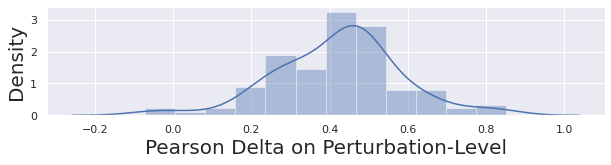

In [368]:
ax = sns.distplot([j['pearson_delta'] for i,j in out.items()])
ax.set_xlabel('Pearson Delta on Perturbation-Level', fontsize = 20)
ax.set_ylabel('Density', fontsize = 20)

In [377]:
for i in adata.var.index.values:
    print(i)

ENSG00000239945
ENSG00000223764
ENSG00000187634
ENSG00000187642
ENSG00000188290
ENSG00000187608
ENSG00000273443
ENSG00000237330
ENSG00000223823
ENSG00000205231
ENSG00000186891
ENSG00000186827
ENSG00000169962
ENSG00000235098
ENSG00000189409
ENSG00000269737
ENSG00000169885
ENSG00000271806
ENSG00000234396
ENSG00000149527
ENSG00000272449
ENSG00000238164
ENSG00000157873
ENSG00000215912
ENSG00000078900
ENSG00000235169
ENSG00000272153
ENSG00000116254
ENSG00000225077
ENSG00000158292
ENSG00000069812
ENSG00000187017
ENSG00000173662
ENSG00000270171
ENSG00000049249
ENSG00000232912
ENSG00000228423
ENSG00000074800
ENSG00000131686
ENSG00000180758
ENSG00000228526
ENSG00000234546
ENSG00000049239
ENSG00000179840
ENSG00000280113
ENSG00000142657
ENSG00000175262
ENSG00000277726
ENSG00000009724
ENSG00000271895
ENSG00000116649
ENSG00000162490
ENSG00000177000
ENSG00000162493
ENSG00000175147
ENSG00000233485
ENSG00000228140
ENSG00000142634
ENSG00000142615
ENSG00000215704
ENSG00000271742
ENSG00000224621
ENSG0000

ENSG00000274124
ENSG00000269514
ENSG00000275228
ENSG00000187166
ENSG00000273765
ENSG00000177627
ENSG00000197376
ENSG00000167531
ENSG00000257660
ENSG00000172602
ENSG00000123416
ENSG00000167552
ENSG00000167553
ENSG00000178401
ENSG00000135519
ENSG00000257964
ENSG00000135472
ENSG00000257771
ENSG00000167580
ENSG00000086159
ENSG00000050405
ENSG00000185432
ENSG00000274797
ENSG00000183283
ENSG00000110934
ENSG00000139610
ENSG00000050438
ENSG00000260122
ENSG00000167612
ENSG00000139567
ENSG00000123358
ENSG00000259884
ENSG00000135480
ENSG00000170442
ENSG00000205426
ENSG00000185640
ENSG00000170421
ENSG00000111057
ENSG00000167779
ENSG00000167780
ENSG00000139631
ENSG00000139626
ENSG00000123349
ENSG00000257605
ENSG00000135409
ENSG00000257550
ENSG00000012822
ENSG00000260030
ENSG00000123364
ENSG00000248265
ENSG00000250432
ENSG00000283073
ENSG00000260470
ENSG00000257596
ENSG00000258137
ENSG00000139572
ENSG00000123338
ENSG00000123360
ENSG00000172551
ENSG00000185821
ENSG00000179695
ENSG00000135404
ENSG0000

In [ ]:
'ENSG00000280113
ENSG00000248601
ENSG00000205755
ENSG00000198223
ENSG00000185291
ENSG00000182162
ENSG00000274516
ENSG00000179695
ENSG00000256632
ENSG00000278772
ENSG00000275147
ENSG00000238282
ENSG00000180424
ENSG00000273554
ENSG00000278633'